### Name : Om Aote
### Roll no : 52
### Batch : C3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
df = pd.read_csv('heart.csv')

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print(df.isnull().sum())

print(df.describe())

print(df.info())


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak        

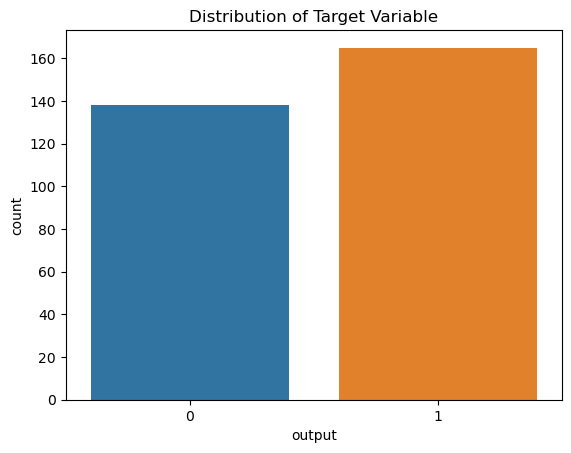

In [ ]:
# Plot the distribution of the target variable (assumed to be 'target')
sns.countplot(x='output', data=df)
plt.title('Distribution of Target Variable')
plt.show()

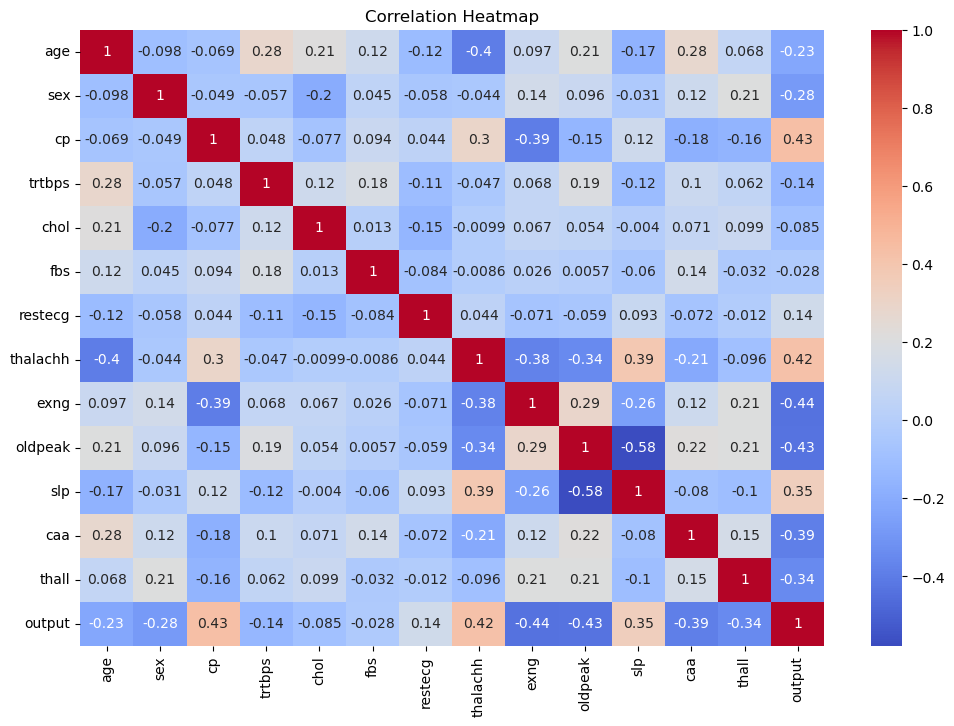

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\cse\Documents\Python Scripts\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


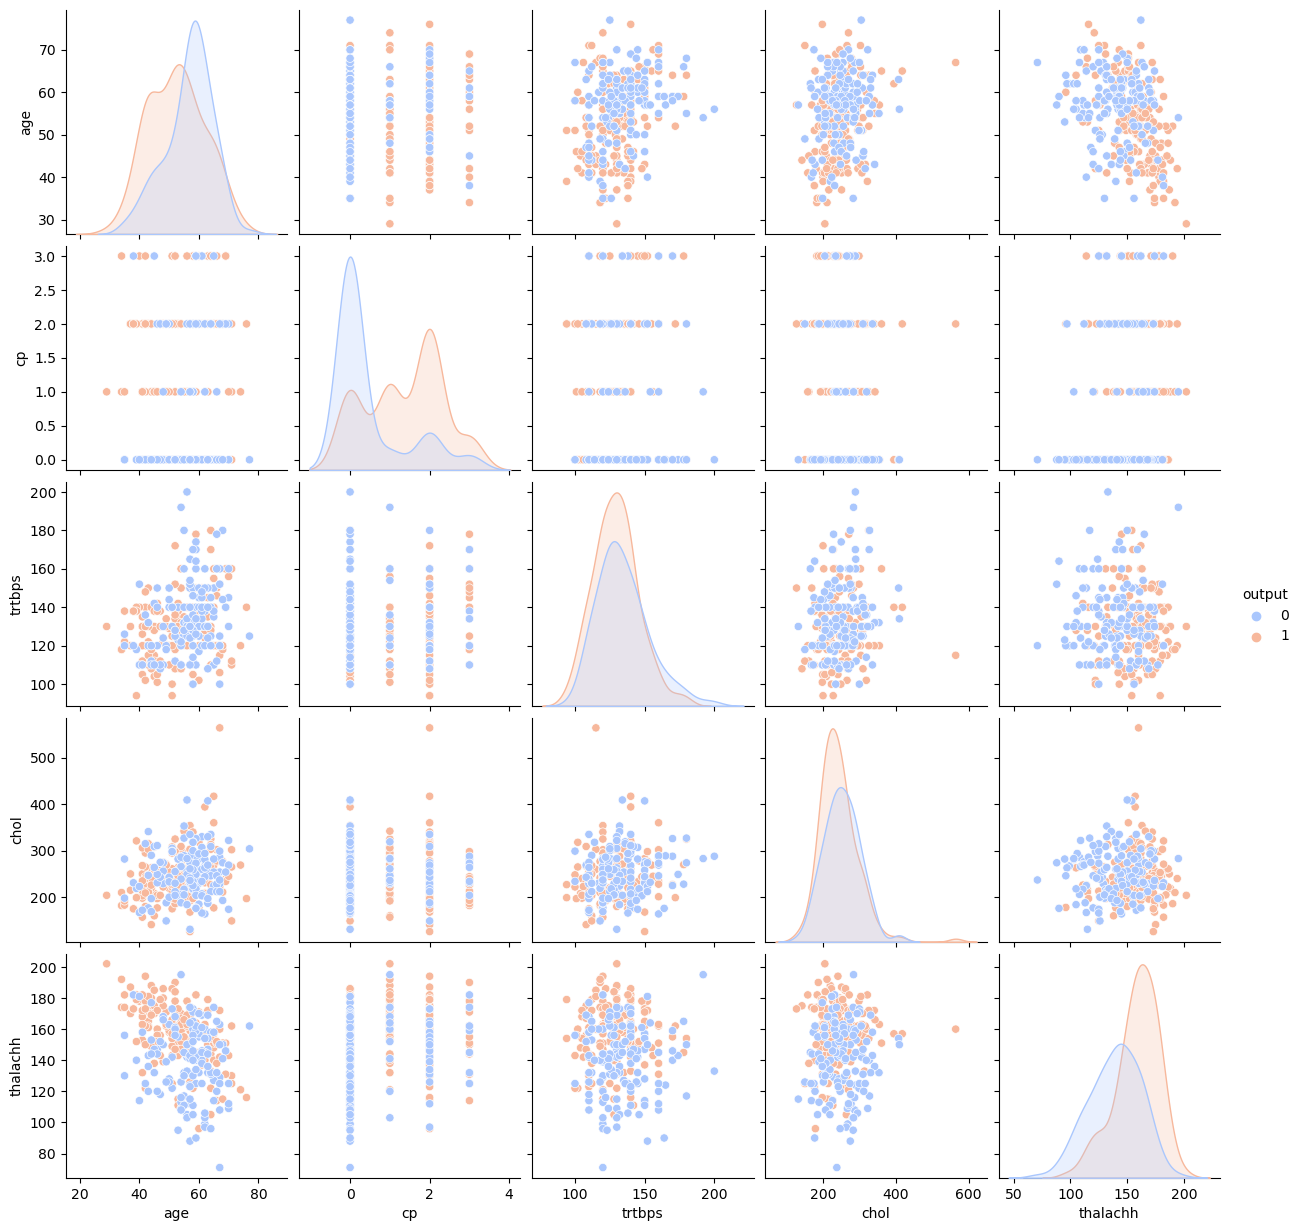

In [ ]:
subset = df[['age', 'cp', 'trtbps', 'chol', 'thalachh', 'output']]

# Generate the pair plot
sns.pairplot(subset, hue='output', palette='coolwarm')
plt.show()

In [ ]:
# Define X (features) and y (target)
X = df.drop(columns=['output'])  # Assuming 'target' is the column for heart attack prediction
y = df['output']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (242, 13)
X_test shape: (61, 13)
y_train shape: (242,)
y_test shape: (61,)


Naive Bayes Classifier Performance:
Accuracy: 0.8688524590163934
Precision: 0.9
Recall: 0.84375
F1 Score: 0.870967741935484


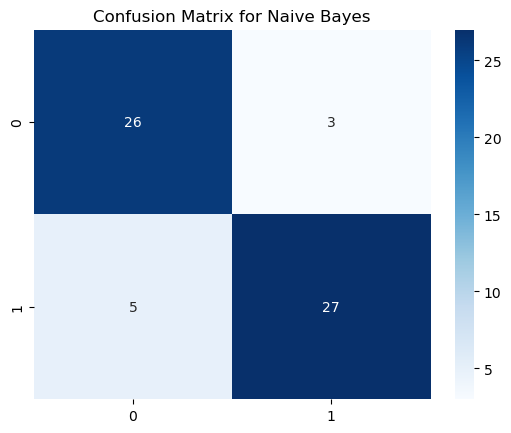

In [ ]:
# Initialize and train the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_nb = nb_model.predict(X_test)

# Evaluate the Naive Bayes model
print("Naive Bayes Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

SVM Classifier Performance:
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1 Score: 0.875


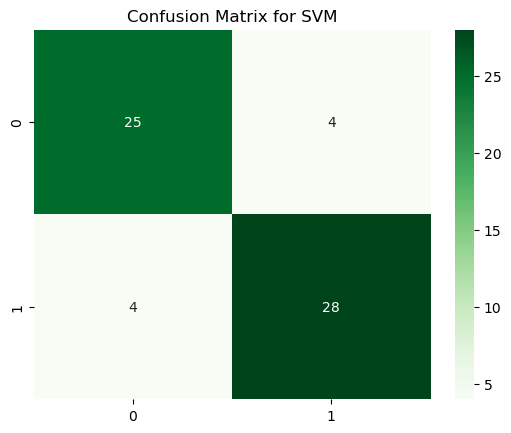

In [ ]:
# Initialize and train the SVM classifier
svm_model = SVC(kernel='linear')  # Using linear kernel for now
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
print("SVM Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for SVM')
plt.show()

In [ ]:
# Define a parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Accuracy:", grid_search_svm.best_score_)

# Predict on the test set using the best parameters
y_pred_svm_tuned = grid_search_svm.best_estimator_.predict(X_test)

# Evaluate the tuned SVM model
print("Tuned SVM Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_tuned))
print("Precision:", precision_score(y_test, y_pred_svm_tuned))
print("Recall:", recall_score(y_test, y_pred_svm_tuned))
print("F1 Score:", f1_score(y_test, y_pred_svm_tuned))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 0.793672839506173
Tuned SVM Classifier Performance:
Accuracy: 0.8852459016393442
Precision: 0.8787878787878788
Recall: 0.90625
F1 Score: 0.8923076923076922
